# Read data 

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [3]:
def readData():
    data_path1 = os.getcwd() + '/data/dataset-of-80s.csv' 
    data_path2 = os.getcwd() + '/data/dataset-of-90s.csv' 
    data_path3 = os.getcwd() + '/data/dataset-of-00s.csv' 
    data_path4 = os.getcwd() + '/data/dataset-of-10s.csv'  


    #print(data_path)
    df80 = pd.read_csv(data_path1)
    df90 = pd.read_csv(data_path2)
    df00 = pd.read_csv(data_path3)
    df10 = pd.read_csv(data_path4)
 
    frames = [df90,df00,df10]
    dataframe = pd.concat(frames)
    dataframe.head()   
    return dataframe,df80,df90,df00,df10

In [4]:
dataframe,df80,df90,df00,df10 = readData()
dataframe.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.000000,17790.00000,1.779000e+04,17790.000000,17790.000000,17790.000000,17790.000000
mean,0.559440,0.656260,5.274817,-8.364215,0.652839,0.088697,0.239137,0.158870,0.196671,0.485603,121.01916,2.498424e+05,3.922709,40.922312,10.812760,0.500000
std,0.187818,0.246307,3.562926,5.305503,0.476081,0.092549,0.307601,0.308722,0.167451,0.255318,29.88302,1.117143e+05,0.379259,19.909212,4.738156,0.500014
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.53500,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.437000,0.505000,2.000000,-9.911000,0.000000,0.035700,0.008810,0.000000,0.093600,0.278000,97.16900,2.000468e+05,4.000000,27.884680,8.000000,0.000000
50%,0.577000,0.700000,5.000000,-6.902000,1.000000,0.050400,0.081600,0.000046,0.128000,0.487000,119.87800,2.334570e+05,4.000000,36.258675,10.000000,0.500000
75%,0.697000,0.857000,8.000000,-5.028000,1.000000,0.096700,0.377000,0.061500,0.257000,0.690000,140.00075,2.766830e+05,4.000000,48.306250,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.992000,0.996000,217.94300,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [7]:
pd.isnull(dataframe).sum() #no null values

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

# Feature engineering

In [8]:
#normalization
from sklearn.preprocessing import MinMaxScaler

def normaliziraj(training):
    scaler = MinMaxScaler(feature_range = (0,1))
    training_n = pd.DataFrame(scaler.fit_transform(training), index=training.index, columns=training.columns)

    return training_n

# EDA: Correlation matrix
### the strongest correlation of popularity is with loudness, danceabilty and energy, and the 3 of them have with valence

In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

def drawCorrM():
    corrmat = dataframe.corr() 
  
    f, ax = plt.subplots(figsize =(9, 8)) 
    sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1) 
    k = 15 
  
    cols = corrmat.nlargest(k, 'target')['target'].index 
  
    cm = np.corrcoef(dataframe[cols].values.T) 
    f, ax = plt.subplots(figsize =(10, 8)) 
  
    sns.heatmap(cm, ax = ax, cbar=True, annot=True, square=True,
                     fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
        
                linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 
    
    plt.savefig(os.getcwd() + '/images/' + 'corrM.eps', format='eps')


In [6]:
def drawPopularityCount():
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    sns.distplot(
        dataframe['target'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
    ).set(xlabel='Popularity', ylabel='Count');


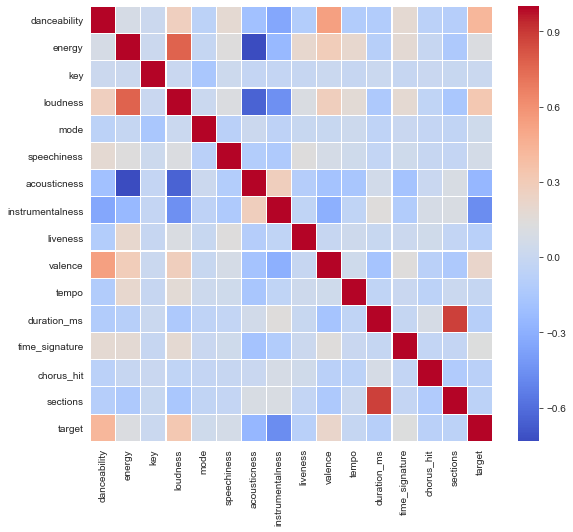

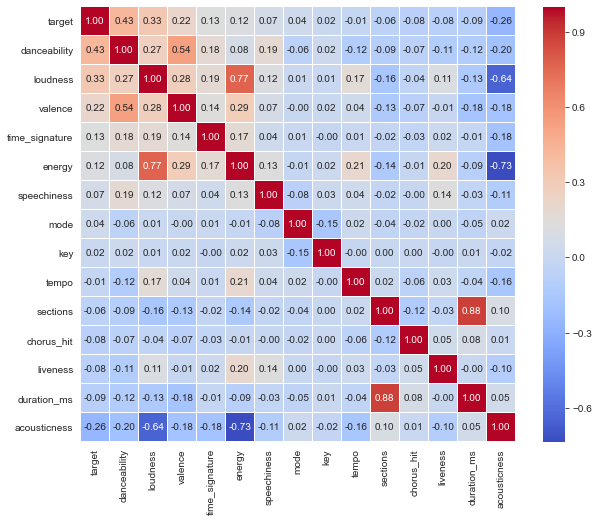

In [9]:
drawCorrM()

In [ ]:
drawPopularityCount()

### Plots 

- popular song distribution

In [33]:
def drawDistribution(df,title):
#     df_plot_p = dataframe[dataframe.target==1]
#     df_plot_unp= dataframe[dataframe.target==0]

    f, axes = plt.subplots(3, 5, figsize=(17, 17))
    sns.distplot( df["duration_ms"] , color="purple", ax=axes[0, 0])
    sns.distplot( df["instrumentalness"] , color="purple", ax=axes[0, 1])
    sns.distplot( df["acousticness"] , color="purple", ax=axes[0, 2])
    sns.distplot( df["danceability"] , color="purple", ax=axes[0, 3])
    sns.distplot( df["energy"] , color="purple", ax=axes[0, 4])
    sns.distplot( df["target"] , color="purple", ax=axes[1, 0])
    sns.distplot( df["key"] , color="purple", ax=axes[1, 1])
    sns.distplot( df["liveness"] , color="purple", ax=axes[1, 2])
    sns.distplot( df["loudness"] , color="purple", ax=axes[1, 3])
    sns.distplot( df["mode"] , color="purple", ax=axes[1, 4])
    sns.distplot( df["tempo"] , color="purple", ax=axes[2, 0])
    sns.distplot( df["speechiness"] , color="purple", ax=axes[2, 1])
    sns.distplot( df["time_signature"] , color="purple", ax=axes[2, 2])
    sns.distplot( df["valence"] , color="purple", ax=axes[2, 3])
    f.delaxes(axes[2][4])
    f.suptitle(title,fontsize=16)


    plt.show()


In [227]:
def drawDistributionForReport(df,title):
    
    f, axes = plt.subplots(3, 3, figsize=(20, 20))
    sns.distplot( df["duration_ms"] , color="purple", ax=axes[0, 0])
    sns.distplot( df["acousticness"] , color="purple", ax=axes[0, 1])
    sns.distplot( df["danceability"] , color="purple", ax=axes[0, 2])
    sns.distplot( df["energy"] , color="purple", ax=axes[1,0])
    sns.distplot( df["liveness"] , color="purple", ax=axes[1,1])
    sns.distplot( df["loudness"] , color="purple", ax=axes[1, 2])
    sns.distplot( df["tempo"] , color="purple", ax=axes[2,0])
    sns.distplot( df["speechiness"] , color="purple", ax=axes[2,1])
    sns.distplot( df["valence"] , color="purple", ax=axes[2, 2])
    #f.delaxes(axes[2][2])
    f.suptitle(title,fontsize=20)
    sns.set_context("paper", rc={"font.size":16,"axes.titlesize":8,"axes.labelsize":1})   

   #plt.savefig(os.getcwd() + '/images/' + 'popular_dist.eps', format='eps')


    plt.show()

    

In [200]:
df_popular = dataframe[dataframe.target==1]

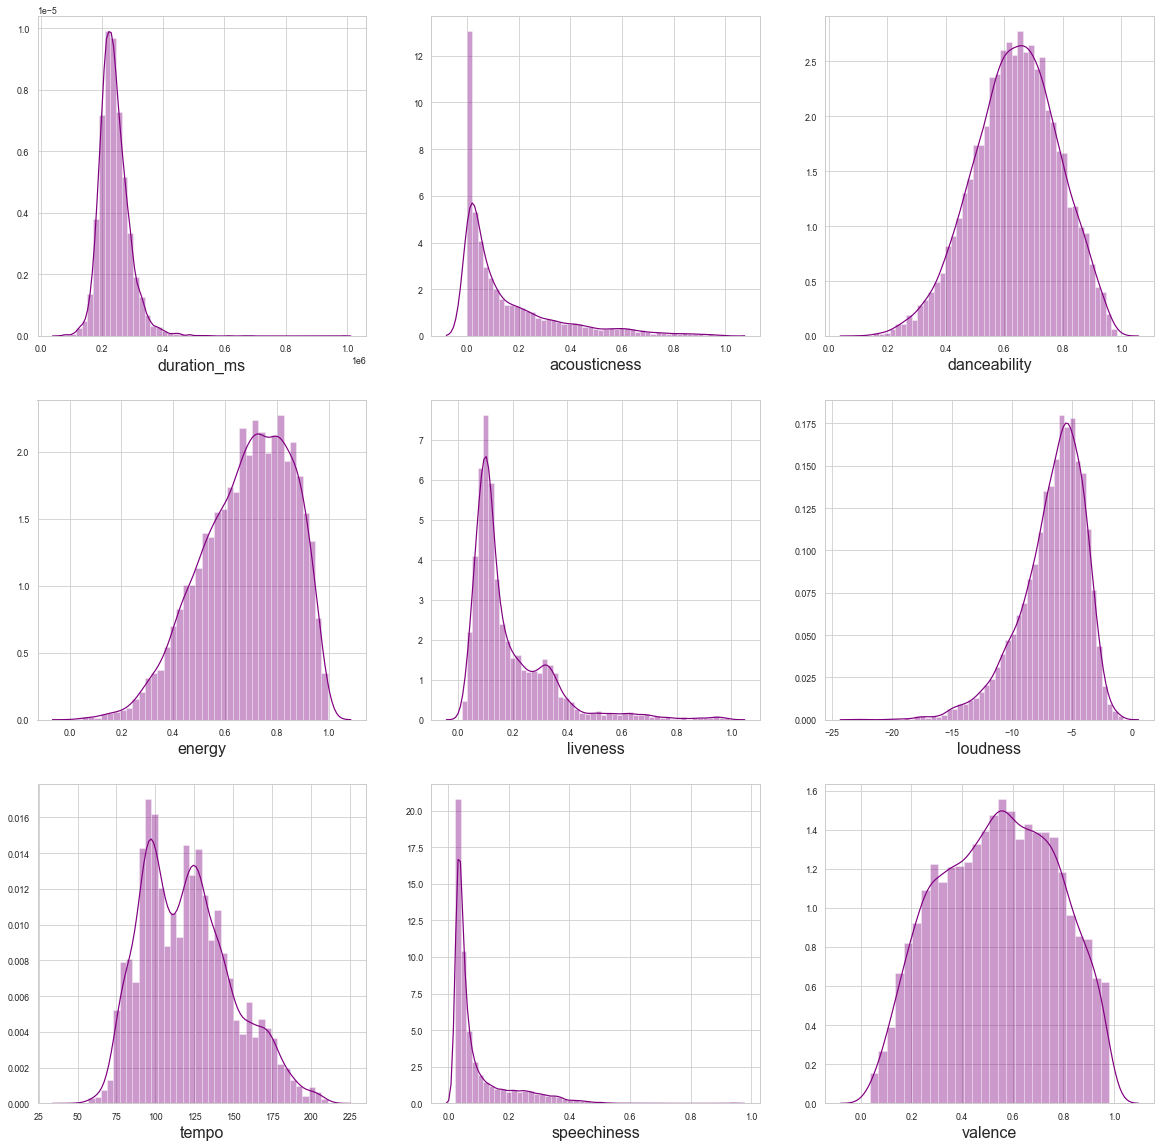

In [228]:
drawDistributionForReport(df_popular, '')

In [11]:
df_unpopular = dataframe[dataframe.target==0]

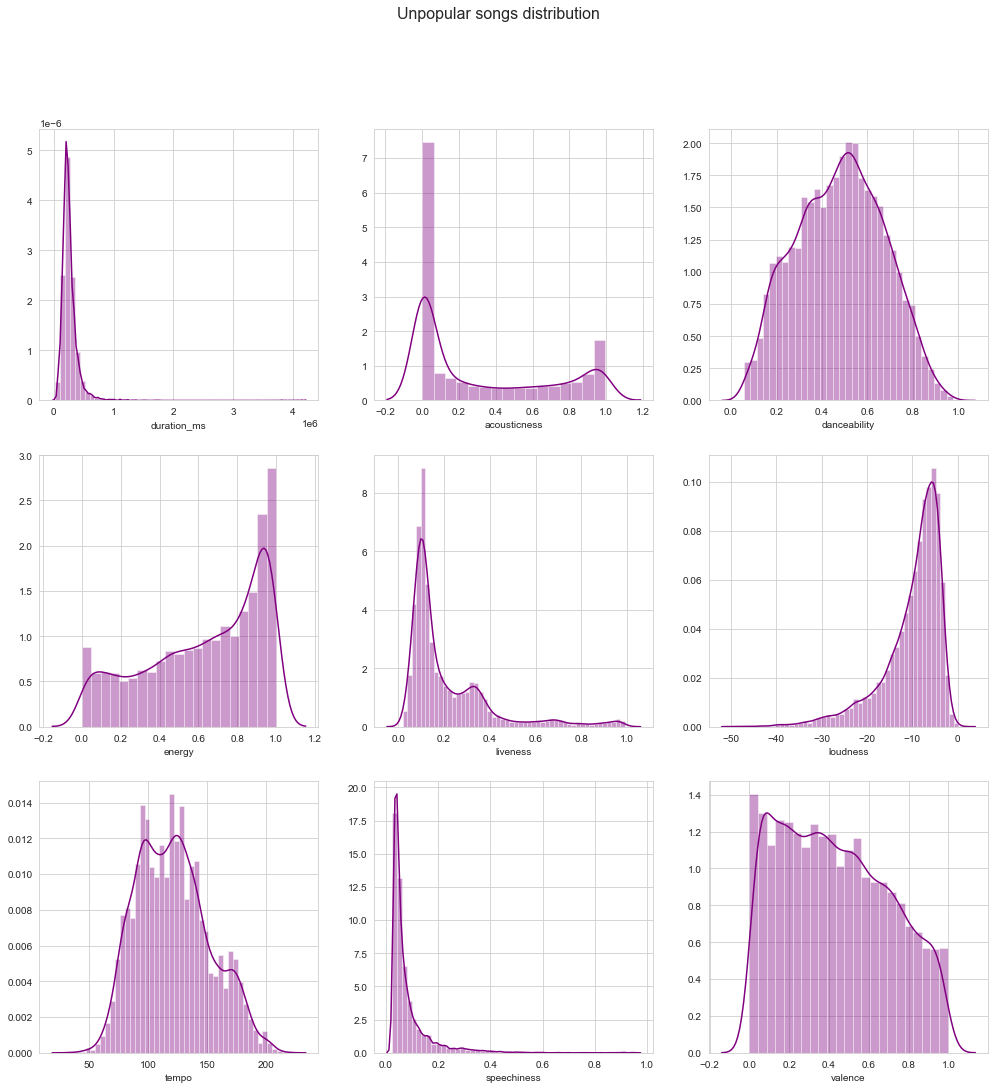

In [70]:
drawDistributionForReport(df_unpopular, 'Unpopular songs distribution')

- danceability of popular songs: mean value high---> danceable songs are more popular

Mean value for danceability for popular songs: 0.6400237211916815
Mean value for danceability for unpopular songs: 0.47885707700955454


Text(0.5, 0.98, 'Popular vs. unpopular distribution')

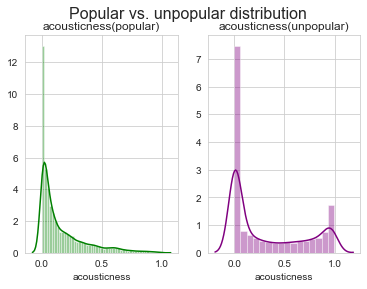

In [85]:
print("Mean value for danceability for popular songs:", df_popular['danceability'].mean())
print("Mean value for danceability for unpopular songs:", df_unpopular['danceability'].mean())


fig, axs = plt.subplots(ncols=2)
sns.distplot(df_popular['acousticness'],color = 'green', ax=axs[0])
axs[0].set_title('acousticness(popular)')
sns.distplot(df_unpopular['acousticness'],color = 'purple', ax=axs[1])
axs[1].set_title('acousticness(unpopular)')
fig.suptitle('Popular vs. unpopular distribution' ,fontsize=16)

- Analiza popularnih i nepopularnih pesama po dekadama 

Danceability:
Moze se zaključiti da pesme označene kao 'unpopular' u dekadi 00ih imaju najmanju prosečnu vrednost(0.456), to jest da su u toj dekadi prolazile kao popularne pesme sa nešto većom vrednošću labele danceability, a u dekadi 80ih su popularne i nepopularne pesme nešto bliže po vrednostima---->80ih pesme su bile više za ples, takav je stil bio


In [195]:
decades = ['80','90','00','10']
dfs = [df80,df90,df00,df10]
means_unpopular = []
means_popular = []
i=0
for df in dfs:
    popular = df[df.target==1]
    unpopular = df[df.target==0]
    print(decades[i] + 's')
    print("Mean value for valence for popular songs:", popular['valence'].mean(), "and unpopular: ",
          unpopular['valence'].mean())
    means_popular.append(popular['valence'].mean())    
    means_unpopular.append(unpopular['valence'].mean())
    i+=1



80s
Mean value for valence for popular songs: 0.6570605385060782 and unpopular:  0.5187832339316745
90s
Mean value for valence for popular songs: 0.58161713768116 and unpopular:  0.49375384057971
00s
Mean value for valence for popular songs: 0.5537907697547688 and unpopular:  0.4107335149863755
10s
Mean value for valence for popular songs: 0.49381297280400166 and unpopular:  0.3936555173491716


- Histograms


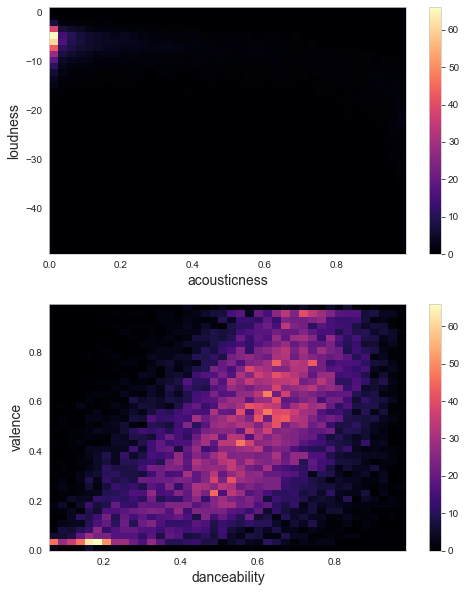

In [197]:
x = "danceability"
y = "valence"

z= "loudness"
f= "acousticness"

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=False, sharex=False, figsize=(8, 10))
fig.suptitle("")
h = ax2.hist2d(dataframe[x], dataframe[y], bins=40,cmap=plt.cm.magma)
h2= ax1.hist2d(dataframe[f], dataframe[z], bins=40,cmap=plt.cm.magma)

ax2.set_xlabel(x,fontsize=14)
ax2.set_ylabel(y,fontsize=14)

ax1.set_xlabel(f,fontsize=14)
ax1.set_ylabel(z,fontsize=14)

plt.colorbar(h[3], ax=ax2)
plt.colorbar(h[3], ax=ax1)
plt.savefig(os.getcwd() + '/images/' + 'dep.png', format='png', dpi= 400)

plt.show()


# Feature selection 


In [7]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.model_selection import train_test_split,cross_val_score

In [6]:
#genre izbaciti, jer kolone imaju vise vrednosti
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence", "loudness"]

In [ ]:
#dividing into 80% training and 20% test data
# training = dataframe.sample(frac = 0.8,random_state = 420)
# X_train = training[features]
# X_train = normaliziraj(X_train)
# y_train = training['target']
# X_test = dataframe.drop(training.index)[features]


In [15]:
X = normaliziraj(dataframe[features])
y = dataframe['target']

### 1) KBest

In [16]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


fs = SelectKBest(score_func=f_regression, k = 13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
#print(X_selected)

names = X.columns.values[fs.get_support()]
scores = fs.scores_[fs.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)


(17790, 13)
          Feat_names     F_Scores
4   instrumentalness  4992.114946
1       danceability  4013.519084
12          loudness  2123.839066
0       acousticness  1268.603664
11           valence   873.990243
10    time_signature   293.097069
3             energy   250.866062
2        duration_ms   139.691297
6           liveness   113.216028
8        speechiness    88.158062
7               mode    25.430706
5                key     5.080296
9              tempo     2.283022


### 2)Pearson correlation

In [18]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature


In [19]:
cor_support, cor_feature = cor_selector(X, y,13)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)


13 selected features
['tempo', 'key', 'mode', 'speechiness', 'liveness', 'duration_ms', 'energy', 'time_signature', 'valence', 'acousticness', 'loudness', 'danceability', 'instrumentalness']


- Recursive Feature Selection

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=7, step=10, verbose=5)
# rfe_selector.fit(X_train, y_train)
# rfe_support = rfe_selector.get_support()
# rfe_feature = X.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')

In [ ]:
# rfe_feature

In [20]:
relevant_features = cor_feature
print(relevant_features)

['tempo', 'key', 'mode', 'speechiness', 'liveness', 'duration_ms', 'energy', 'time_signature', 'valence', 'acousticness', 'loudness', 'danceability', 'instrumentalness']


### Dimensionality reduction - PCA

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [43]:
def splitData():
    X = dataframe[relevant_features]
    y = dataframe['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)
    #print(X_train)
    X_train = normaliziraj(X_train)
    X_test = normaliziraj(X_test)
    return X_train, X_test,y_train, y_test

In [44]:
X_train, X_test, y_train, y_test = splitData()

In [22]:
X_train.describe()

,tempo,key,mode,speechiness,liveness,duration_ms,energy,time_signature,valence,acousticness,loudness,danceability,instrumentalness
count,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000,14232.00000,14232.000000,14232.000000,14232.000000,14232.000000,14232.000000
mean,0.472852,0.481182,0.653949,0.071839,0.183823,0.061339,0.656653,0.78450,0.487634,0.239538,0.811433,0.544064,0.160467
std,0.163897,0.324182,0.475726,0.099949,0.171187,0.028586,0.246794,0.07649,0.256536,0.308803,0.105385,0.203854,0.310995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.342152,0.181818,0.000000,0.014668,0.078848,0.048373,0.506382,0.80000,0.278112,0.008730,0.780676,0.411956,0.000000
50%,0.465743,0.454545,1.000000,0.030514,0.113093,0.057107,0.700625,0.80000,0.488956,0.082580,0.840395,0.563569,0.000046
75%,0.575264,0.727273,1.000000,0.080514,0.245360,0.068456,0.857822,0.80000,0.694779,0.374498,0.877813,0.693524,0.061448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 8) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [42]:

print(explained_variance)
sum(explained_variance)

[0.29873608 0.23387326 0.12936963 0.115089   0.07496084 0.04345298
 0.03527273 0.02666939]


0.9574239131725175

>1 0.518 (0.011)
>2 0.675 (0.012)
>3 0.674 (0.012)
>4 0.715 (0.013)
>5 0.740 (0.012)
>6 0.762 (0.013)
>7 0.762 (0.013)
>8 0.781 (0.013)
>9 0.778 (0.013)
>10 0.782 (0.013)
>11 0.782 (0.013)
>12 0.792 (0.014)
>13 0.793 (0.013)


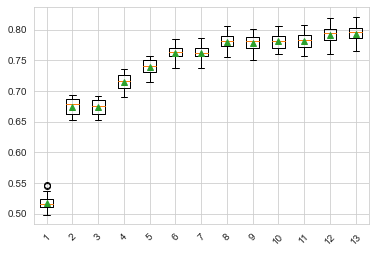

In [37]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,14):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression(C=10, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False))]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = X_train, y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# Prediction

##### Before optimization: 

In [45]:
from sklearn.metrics import classification_report

LR_Model = LogisticRegression()
KNN_Model = KNeighborsClassifier()
RF_Model = RandomForestClassifier()
NB_Model = GaussianNB()
SVM_Model = svm.SVC()

In [50]:
#confusion matrix:
def plot_confusion_matrix(cm,classes=None, title="Confusion matrix"):
    if classes is not None:
        ax = sns.heatmap(cm, square = True, linewidths = 0.1, xticklabels = classes, yticklabels = classes, vmin = 0, vmax = 1, annot = True, annot_kws={'size':25})
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    else:
        ax = sns.heatmap(cm, vmin = 0., vmax = 1.)
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [ ]:
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_train, LR_Predict)
# cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)
# plot_confusion_matrix(cm_norm,classes = LR_Model.classes_)

## Hyperparameter tuning

In [46]:
def get_cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
# loop through list of models


In [52]:
models = [LR_Model, KNN_Model, SVM_Model, RF_Model, NB_Model]
for model in models:
    steps = [('pca', PCA(n_components=8)), ('m', model)]
    model = Pipeline(steps=steps)
    print(model)
    get_cv_scores(model)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('m',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
CV Mean:  0.7793001686340641
STD:  0.0046565602939238355


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
  

### Grid search
##### The grid search uses cross validation to test which model is better. 

Koristiti za validaciju modela 

1) Logistic Regression

In [112]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=LR_Model, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=5)


In [113]:
best_model_LR = grid.fit(X_train, y_train)

print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', grid.best_estimator_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score:  0.7931409349289769
Best Params:  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
Best Estimator:  LogisticRegression(C=10, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   21.6s finished


In [114]:
#predict on test data using the best model
y_true_LR, y_pred_LR = y_test, best_model_LR.best_estimator_.predict(X_test)
print(roc_auc_score(y_true_LR, y_pred_LR))

print( classification_report(y_true_LR,y_pred_LR))

0.7965657774665761
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1786
           1       0.75      0.88      0.81      1772

    accuracy                           0.80      3558
   macro avg       0.81      0.80      0.79      3558
weighted avg       0.81      0.80      0.79      3558



2)Random Forest

In [116]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [4,5,6,7,8,9,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [117]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 7 , verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model



In [118]:
best_model_RF = rf_random.fit(X_train, y_train)

print('Best Score: ', best_model_RF.best_score_)
print('Best Params: ', best_model_RF.best_params_)
print('Best Estimator: ', best_model_RF.best_estimator_)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 70.8min finished


Best Score:  0.8407104174573671
Best Params:  {'n_estimators': 1786, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 40, 'bootstrap': True}
Best Estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1786,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [119]:
#predict on test data using the best model
y_true_RF, y_pred_RF = y_test, best_model_RF.predict(X_test)
print(accuracy_score(y_true_RF, y_pred_RF))

print( classification_report(y_true_RF,y_pred_RF))

0.8285553681843733
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1786
           1       0.81      0.85      0.83      1772

    accuracy                           0.83      3558
   macro avg       0.83      0.83      0.83      3558
weighted avg       0.83      0.83      0.83      3558



2) SVM

In [124]:
from sklearn import svm

#def svc_param_selection(X, y, nfolds):
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3,scoring='accuracy')

In [125]:
best_model_svm = grid.fit(X_train, y_train)
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Estimator: ', best_model_svm.best_estimator_)

Best Score:  0.8219505340078697
Best Params:  {'C': 10, 'gamma': 1}
Best Estimator:  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [126]:
#predict on test data using the best model
y_true_SVM, y_pred_SVM = y_test, best_model_svm.predict(X_test)
print(roc_auc_score(y_true_SVM, y_pred_SVM))

print( classification_report(y_true_SVM,y_pred_SVM))

0.8215702643333274
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1786
           1       0.77      0.90      0.83      1772

    accuracy                           0.82      3558
   macro avg       0.83      0.82      0.82      3558
weighted avg       0.83      0.82      0.82      3558



3) Naive Bayes

In [127]:
gnb = GaussianNB()
gnb_fitted = gnb.fit(X_train, y_train)
y_true_GNB, y_pred_GNB = y_test, gnb_fitted.predict(X_test)
print(roc_auc_score(y_true_GNB, y_pred_GNB))
print( classification_report(y_true_GNB,y_pred_GNB))

0.7574251325205574
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      1786
           1       0.70      0.89      0.79      1772

    accuracy                           0.76      3558
   macro avg       0.78      0.76      0.75      3558
weighted avg       0.78      0.76      0.75      3558



4)K-NN

In [128]:
grid_params = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs_kNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3,n_jobs = -1,scoring = "accuracy")


In [129]:
gs_kNN_res = gs_kNN.fit(X_train, y_train)
print('Best Score: ', gs_kNN.best_score_)
print('Best Params: ', gs_kNN.best_params_)
print('Best Estimator: ', gs_kNN.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.8043844856661045
Best Params:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.3s finished


In [130]:
y_true_KNN, y_pred_KNN = y_test, gs_kNN_res.predict(X_test)
print(roc_auc_score(y_true_KNN, y_pred_KNN))
print( classification_report(y_true_KNN,y_pred_KNN))

0.7941611960596463
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1786
           1       0.74      0.91      0.81      1772

    accuracy                           0.79      3558
   macro avg       0.81      0.79      0.79      3558
weighted avg       0.81      0.79      0.79      3558



5) NN

- tuning epochs and batch size

In [136]:
# baseline model
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [137]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [138]:
epochs=[10,20,30,40,50,60,70]
batch_size = [3,4,5,6,8,10, 20, 40, 60, 80, 100]
param_grid_nn = dict(batch_size=batch_size, epochs=epochs)

grid_nn = GridSearchCV(estimator=model, param_grid=param_grid_nn, n_jobs=-1, cv=3)
grid_result_nn = grid_nn.fit(X_train, y_train)

In [139]:
# summarize results
print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))
means = grid_result_nn.cv_results_['mean_test_score']
stds = grid_result_nn.cv_results_['std_test_score']
params = grid_result_nn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.818929 using {'batch_size': 4, 'epochs': 70}
0.804806 (0.013355) with: {'batch_size': 3, 'epochs': 10}
0.813519 (0.004429) with: {'batch_size': 3, 'epochs': 20}
0.814643 (0.005078) with: {'batch_size': 3, 'epochs': 30}
0.815556 (0.006160) with: {'batch_size': 3, 'epochs': 40}
0.817032 (0.003438) with: {'batch_size': 3, 'epochs': 50}
0.818437 (0.004535) with: {'batch_size': 3, 'epochs': 60}
0.817735 (0.002138) with: {'batch_size': 3, 'epochs': 70}
0.806563 (0.010191) with: {'batch_size': 4, 'epochs': 10}
0.806563 (0.008947) with: {'batch_size': 4, 'epochs': 20}
0.811832 (0.004217) with: {'batch_size': 4, 'epochs': 30}
0.814503 (0.003481) with: {'batch_size': 4, 'epochs': 40}
0.817102 (0.004648) with: {'batch_size': 4, 'epochs': 50}
0.815627 (0.004294) with: {'batch_size': 4, 'epochs': 60}
0.818929 (0.003557) with: {'batch_size': 4, 'epochs': 70}
0.805368 (0.006122) with: {'batch_size': 5, 'epochs': 10}
0.810216 (0.007231) with: {'batch_size': 5, 'epochs': 20}
0.811200 (0.005039)

- tuning learn rate and momentum

In [141]:
def create_model2(learn_rate=0.01, momentum=0.2):
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	optimizer = SGD(lr = learn_rate, momentum = momentum)
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [ ]:
# # evaluate model with standardized dataset
# estimator = KerasClassifier(build_fn=create_baseline, epochs=25, batch_size=5, verbose=0)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [144]:
from keras.optimizers import SGD

estimator = KerasClassifier(build_fn=create_model2, epochs=70, batch_size=4, verbose=0)

estimator.fit(X_train,y_train)

In [145]:
y_true_NN, y_pred_NN = y_test, estimator.predict(X_test)
print(roc_auc_score(y_true_NN, y_pred_NN))

print( classification_report(y_true_NN,y_pred_NN))

0.8161184052538049
              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1786
           1       0.78      0.87      0.82      1772

    accuracy                           0.82      3558
   macro avg       0.82      0.82      0.82      3558
weighted avg       0.82      0.82      0.82      3558



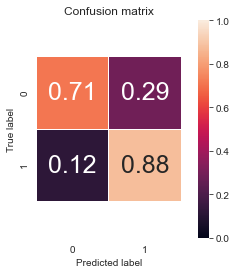

In [74]:
 from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=10, class_weight={0: 0.5, 1: 0.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
LR_Predict = LR_model.fit(X_train, y_train)
y_true_LR, y_pred_LR = y_test, LR_Predict.predict(X_test)

cm = confusion_matrix(y_true_LR, y_pred_LR)
cm_norm = cm / cm.sum(axis = 1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes = LR_Predict.classes_)

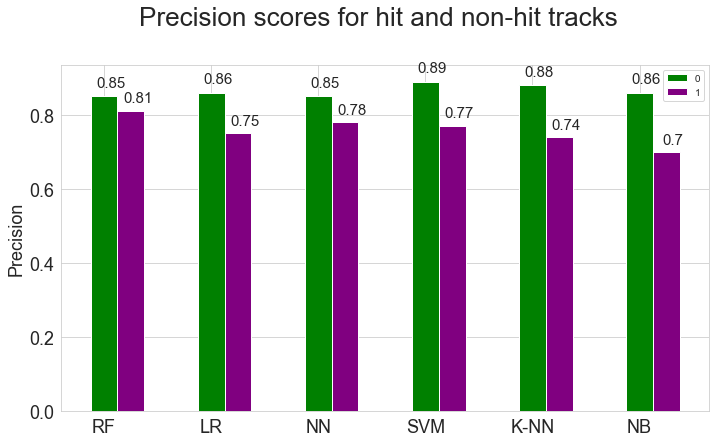

In [190]:
import numpy as np
import matplotlib.pyplot as plt
data1 = (0.85, 0.86, 0.85,0.89,0.88,0.86)
data2 = (0.81,0.75,0.78,0.77,0.74,0.70)
# data = [[0.85, 0.86, 0.85,0.89,0.88,0.86],
# [0.81,0.75,0.78,0.77,0.74,0.70]]
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,1,1.5,1.2])
bar1 = ax.bar(X + 0.00, data1, color = 'g', width = 0.25)
bar2 = ax.bar(X + 0.25, data2, color = 'purple', width = 0.25)
ax.set_ylabel('Precision',fontsize=18)
ax.set_title('Precision scores for hit and non-hit tracks  ',fontsize=26,pad=40)

plt.xticks(X, ('RF', 'LR', 'NN', 'SVM', 'K-NN', 'NB'), )
ax.tick_params(axis='both', which='major', labelsize=18)
ax.legend(labels=['0', '1'],fontsize=10)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + 3*rect.get_width()/4., 1.02*height,
                height,
                ha='center', va='bottom',fontsize=15)
        
autolabel(bar1)
autolabel(bar2)
plt.savefig(os.getcwd() + '/images/' + 'precision01.png', format='png',bbox_inches = "tight", dpi = 200)



In [ ]:
*